In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
samples = np.loadtxt("kmeansSamples.txt")
n_clusters = 3 # 分簇的数量
n_init = 1 # 指定kmeans算法重复运行次数
estimator = KMeans(init='k-means++', n_clusters=1, n_init=n_init)  # 设置n_clusters=1是为了计算SSE值
estimator.fit(samples)
samples = [samples]
SSE = [estimator.inertia_] # 记录下簇的SSE值
print(SSE)

[1770.945095115084]


#### 分裂主循环

In [22]:
while len(SSE) < n_clusters:
    max_changed_SSE = 0
    tag = -1
    for i in range(len(SSE)): # 对每个簇进行试分簇，计算SSE的减少量
        estimator = KMeans(init='k-means++', n_clusters=2, n_init=n_init).fit(samples[i]) # 二分簇
        changed_SSE = SSE[i] - estimator.inertia_
        print(estimator.inertia_, ' - ', changed_SSE)
        if changed_SSE > max_changed_SSE: # 比较SSE值是不是减少了
            max_changed_SSE = changed_SSE
            tag = i
    # 正式分簇
    estimator = KMeans(init='k-means++', n_clusters=2, n_init=n_init).fit(samples[tag])
    indexs0 = np.where(estimator.labels_ == 0) # 标签为0的样本在数组中的下标
    cluster0 = samples[tag][indexs0] # 从簇中分出标签为0的新簇
    indexs1 = np.where(estimator.labels_ == 1)
    cluster1 = samples[tag][indexs1] # 从簇中分出标签为1的新簇
    
    del samples[tag]
    samples.append(cluster0)
    samples.append(cluster1)
    del SSE[tag]
    estimator = KMeans(init='k-means++', n_clusters=1, n_init=n_init).fit(cluster0)
    SSE.append(estimator.inertia_) # 新簇的SSE值
    estimator = KMeans(init='k-means++', n_clusters=1, n_init=n_init).fit(cluster1)
    SSE.append(estimator.inertia_)

785.3905115817278  -  985.5545835333563
317.0461947316521  -  260.17539981058917
89.4762832591016  -  99.49083754681446


#### 简单应用示例

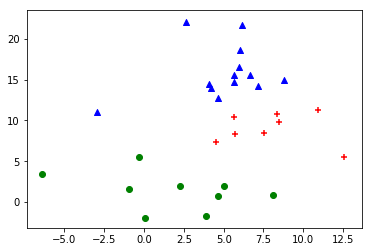

In [23]:
markers = [ 'o', '+', '^', 'x', 'D', '*', 'p' ]
colors  = [ 'g', 'r', 'b', 'c', 'm', 'y', 'k' ]
linestyle = [ '-', '--', '-.', ':' ]
if len(samples) <= len(markers):
    for i in range(len(samples)):
        plt.scatter(samples[i][:, 0], samples[i][:, 1], marker=markers[i], c=colors[i])
    plt.show()